## Оглавление
1. [Знакомоство с данными](#pre_processing)
2. [Исследовательский анализ данных (EDA)](#analysis)
3. [Модель прогнозирования оттока клиентов](#model)
4. [Кластеризация клиентов](#cluster)
5. [Выводы и рекомендации](#sumup)

**Разработка стратегии взаимодействия с клиентами для сети фитнес-центров «Культурист-датасаентист»**

Столкнувшись с оттоком клиентов, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Нам необходимо провести анализ и подготовить план действий по удержанию клиентов:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1. Выделить целевые группы клиентов;
2. Предложить меры по снижению оттока;
3. Определить другие особенности взаимодействия с клиентами.


**Цель исследования** — подготовить исследование для дальнейшей разработки стратегии взаимодействия с клиентами.

**Ход исследования**

Перед анализом данных понадобится обзор и предобработка данных. Необходимо проверить данные на ошибки и оценить их влияние на исследование.

В итоге мы сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания.

Таким образом, исследование пройдёт в пять этапов:

1. Обзор данных.
2. Исследовательский анализ данных.
3. Построение модели прогнозирования оттока клиентов.
4. Кластеризация клиентов.
5. Выводы и рекомендации.

## 1. Знакомство с данными
<a name="data"></a>

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
import itertools

In [150]:
# изучим данные

try:
    data = pd.read_csv('/datasets/gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [151]:
data.info() # выведем сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [152]:
# проверим данные на дубликаты
data.duplicated().mean()

0.0

In [153]:
# изменим тип данных для столбцов Near_Location, Partner, Promo_friends, Phone, Group_visits и Churn на булев
columns = ['Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
data[columns] = data[columns].astype('bool')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,True,True,True,False,6,True,29,14.227470,5.0,3,0.020398,0.000000,False
1,0,True,False,False,True,12,True,31,113.202938,12.0,7,1.922936,1.910244,False
2,0,True,True,False,True,1,False,28,129.448479,1.0,2,1.859098,1.736502,False
3,0,True,True,True,True,12,True,33,62.669863,12.0,2,3.205633,3.357215,False
4,1,True,True,True,True,1,False,26,198.362265,1.0,3,1.113884,1.120078,False


### Вывод
В данных 4000 строк и 14 столбцов, отсутствуют явные дубликаты. Мы заменили тип данных для столбцов `Near_Location`, `Partner`, `Promo_friends`, `Phone`, `Group_visits` и `Churn` на булев.

## 2. Исследовательский анализ данных (EDA)
<a name="analisys"></a>

### Задача
- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

In [154]:
# проверим, есть ли выбивающиеся значения в столбцах
data.describe()
# аномалий нет

,gender,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,0.499957,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,0.000000,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,1.000000,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,1.000000,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [155]:
# проверим, есть ли выбивающиеся значения в столбцах типа bool
data['Near_Location'].unique()
# аномалий нет

array([ True, False])

In [156]:
data['Partner'].unique()
# аномалий нет

array([ True, False])

In [157]:
data['Promo_friends'].unique()
# аномалий нет

array([ True, False])

In [158]:
data['Phone'].unique()
# аномалий нет

array([False,  True])

In [159]:
data['Group_visits'].unique()
# аномалий нет

array([ True, False])

In [160]:
data['Churn'].unique()
# аномалий нет

array([False,  True])

В столбцах нет выбивающихся значений.
Посмотрим на средние значения признаков в двух группах: тех, кто ушел, и тех, кто остался.

In [161]:
data.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
True,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Построим гистограммы распределения признаков и тепловую карту корреляции между ними.



In [162]:
data = data.astype('float') # приведем данные к числовому типу

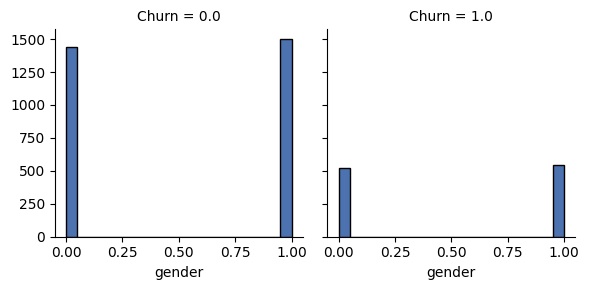

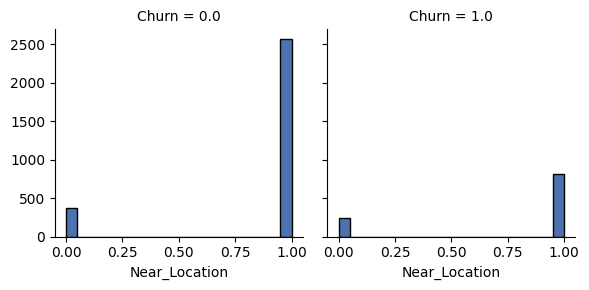

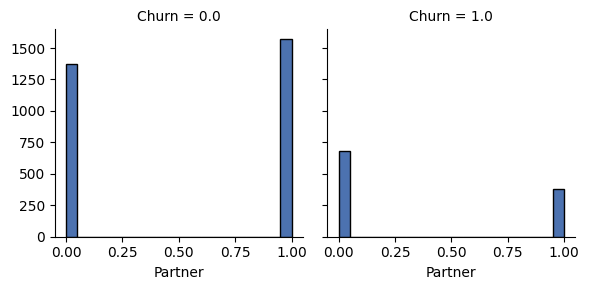

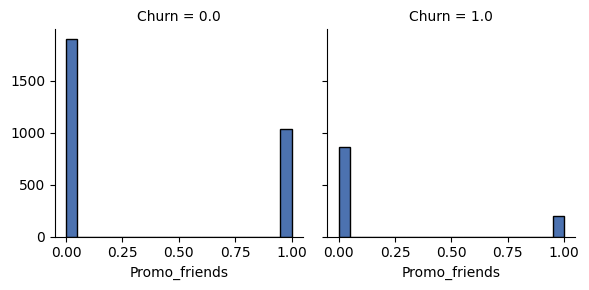

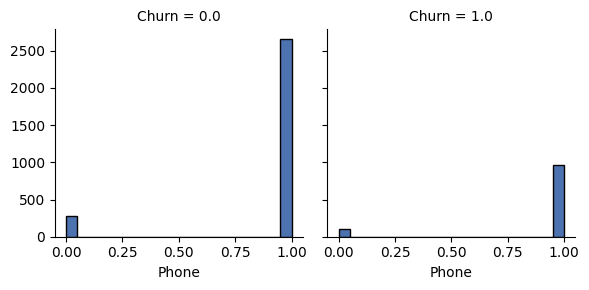

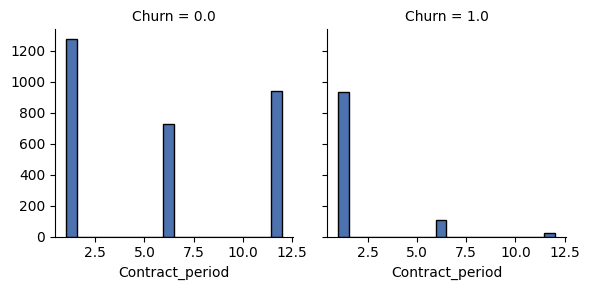

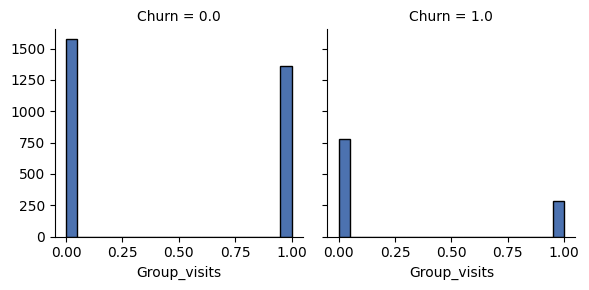

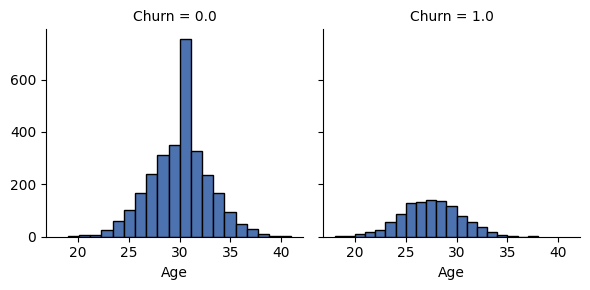

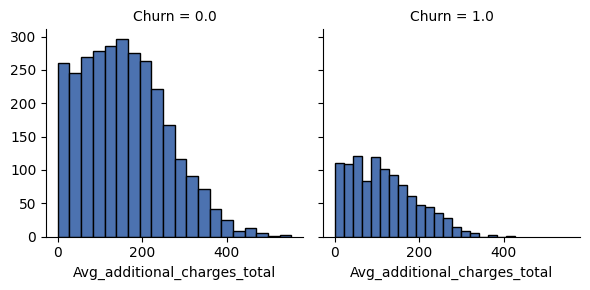

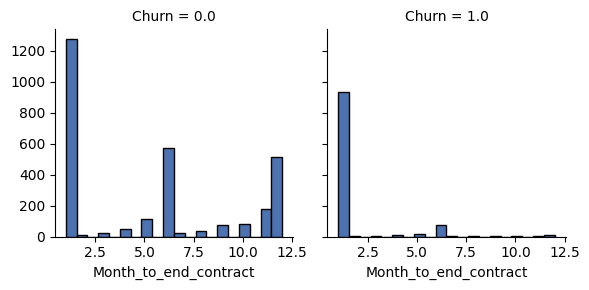

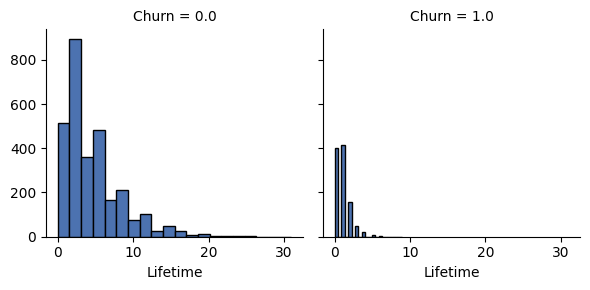

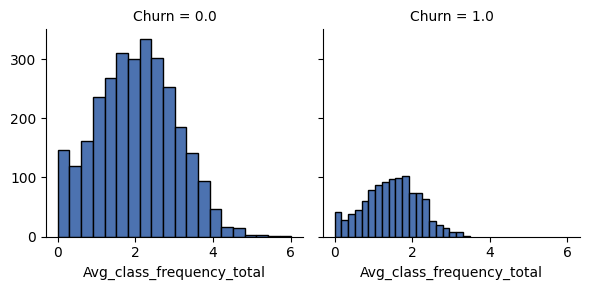

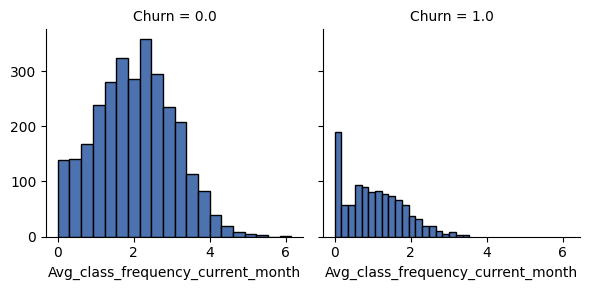

In [163]:
# построим гистограммы распределения признаков

for column in data.drop(columns=['Churn']).columns:
    g = sns.FacetGrid(data, col="Churn", col_wrap=2)
    g.map(plt.hist, column, bins=20, ec="k")
    plt.show()


Распределение по гендеру практически равномерное, большая доля ушедших и оставшихся клиентов живут рядом, также одинакова доля оставивших номер телефона. 

Следующие признаки различаются:
- среди оставшихся клиентов больше сотрудников компании-партнёра клуба, чем среди ушедших (53% против 35%);
- срок контракта месяцев больше у оставшихся клиентов, чем у ушедших (5,7 против 1,7);
- также оставшиеся клиенты чаще посещают групповые занятия (46% против 27%);
- средний возраст оставшихся клиентов - почти 30 лет, ушедших - почти 27;
- суммарная выручка от других услуг фитнес-центра выше для оставшихся клиентов - 158 у.е. против 115 у.е. для ушедших;
- количество оставшихся до окончания котракта месяцев больше для оставшихся клиентов, чем для ушедших (5,2 против 1,6);
- время с момента первого обращения в фитнес-центр: 4.7 месяцев для оставшихся и 0,99 месяцев для ушедших;
- средняя частота посещений в неделю за все время с начала действия абонемента: 2 против 1,5 для оставшихся и ушедших соответственно;
- средняя частота посещений в неделю за предыдущий месяц: 2 против 1 для оставшихся и ушедших соответственно.

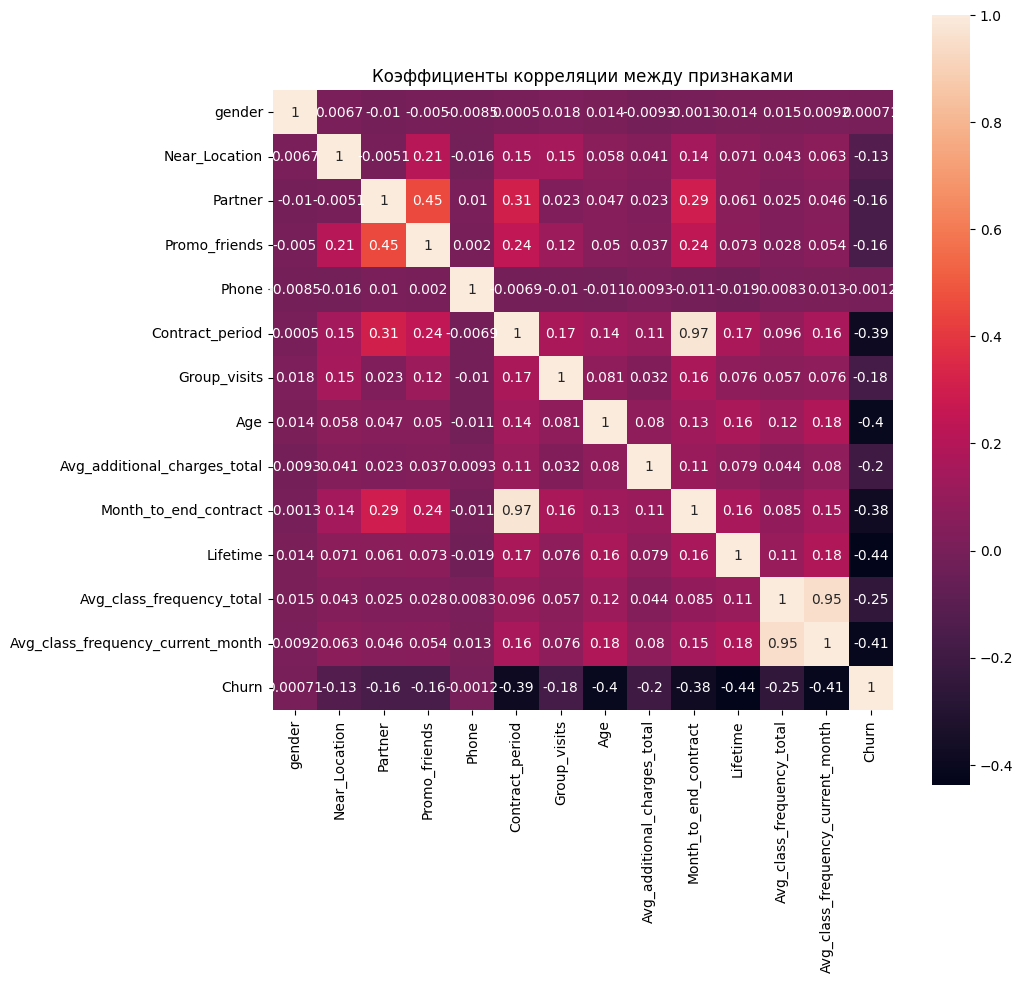

In [164]:
# посмотрим на корреляцию между признаками
cm = data.corr()

plt.figure(
    figsize=(10, 10)
)
ax = sns.heatmap(cm, annot = True, square=True)
plt.xticks(rotation=90)
ax.set_title('Коэффициенты корреляции между признаками') 
plt.show()

- Самая высокая корреляция между сроком контракта и количеством месяцев до его окончания, а также между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц, что видится логичным, т.к. предоставленные данные содержат информацию на месяц до оттока.
- Умеренный уровень корреляции (коэффициент 0,45) у признаков Partner и Promo Friend, что может означать, что сотрудники компании-партнера клуба активно приглашали своих коллег записаться в рамках акции «приведи друга».
- Остальные коэффициенты очень низкие.
- Стоит отметить умеренный отрицательную корреляцию (-0,45) у полей между временем с момента первого обращения в фитнес-центр и фактом оттока, то есть чем дольше клиент является клиентом клуба, тем меньше вероятность его ухода. 
- Коэффициент -0,4 у признаков Age и Churn говорит о том возраст также умеренно влияет на факт оттока, чем старше человек, тем меньше вероятность его ухода.


### Вывод
- гендер и факт указания номера телефона не влияет на решение прекратить занятия в центре. Среди тех, кто продолжает заниматься, большую долю занимают сотрудники компании-партнера возрастом около 30 лет с длительным сроком контракта (и сроком до его окончания), активно посещающие групповые занятия. Они тратят чуть больше на сопутствущие услуги центра и в 1,3 раза чаще посещают фитнес-центр (за все время с начала действия абонемента);
- сотрудники компании-партнера клуба активно приглашают своих коллег записаться в рамках акции «Приведи друга». Есть зависимость между фактом длительности нахождения в списках клиентов клуба и оттоком: чем дольше человек был клиентом, тем ниже вероятность его ухода. Также ниже вероятность ухода у более возрастных посетителей.

## 3. Модель прогнозирования оттока клиентов
<a name="model"></a>

### Задача
Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами:
  - логистической регрессией,
  - случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

In [165]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

In [166]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [167]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)


In [168]:
# зададим список моделей
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(random_state=0),
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    )


In [169]:
# цикл, который выводит метрики по списку моделей

for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0, solver='liblinear')
Accuracy:0.92 Precision:0.85 Recall:0.83 
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.84 Recall:0.81 


### Вывод

- Доля верно угаданных ответов из всех прогнозов одинакова для обеих моделей и достаточно высока: Accuracy 92%;
- Метрика Precision говорит нам о том, какая доля прогнозов относительно "1" класса верна. Для логистической регрессии этот показатель выше, чем для случайного леса: 0,85 против 0,84;
- Recall показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Эта метрика ниже для случайного леса: 0.81 против 0,83.

Обе модели показывают достаточно хорошие результаты.

## 4. Кластеризация клиентов
<a name="cluster"></a>

### Задача
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

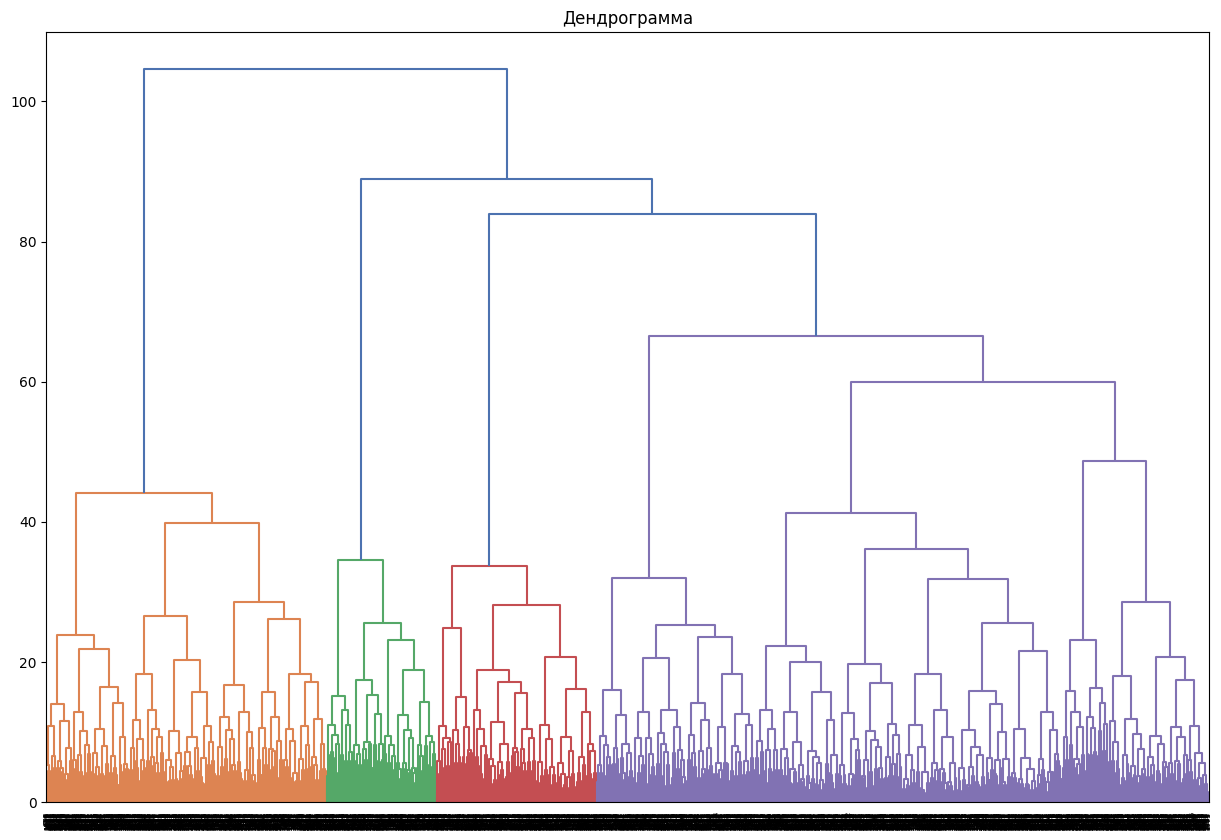

In [170]:

# обязательная стандартизация данных перед работой с алгоритмами
X_sc = scaler.fit_transform(X)
# построим матрицу расстояний
linked = linkage(X_sc, method = 'ward')

# нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

Дендгограмма выделяет четыре кластера.

In [171]:
import warnings
warnings.filterwarnings("ignore")

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = data.groupby('cluster_km').mean()
print(clusters)


              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502970       0.959406  0.783168       0.574257  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.559666       0.976134  0.356802       0.230310  0.998807   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.889109      0.542574  29.982178   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.669451      0.473747  30.125298   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

Распределение для признака gender


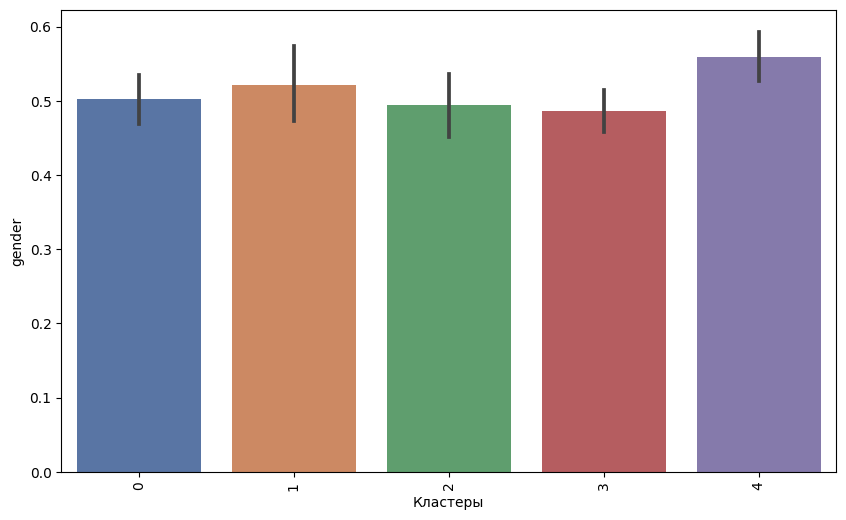

Распределение для признака Near_Location


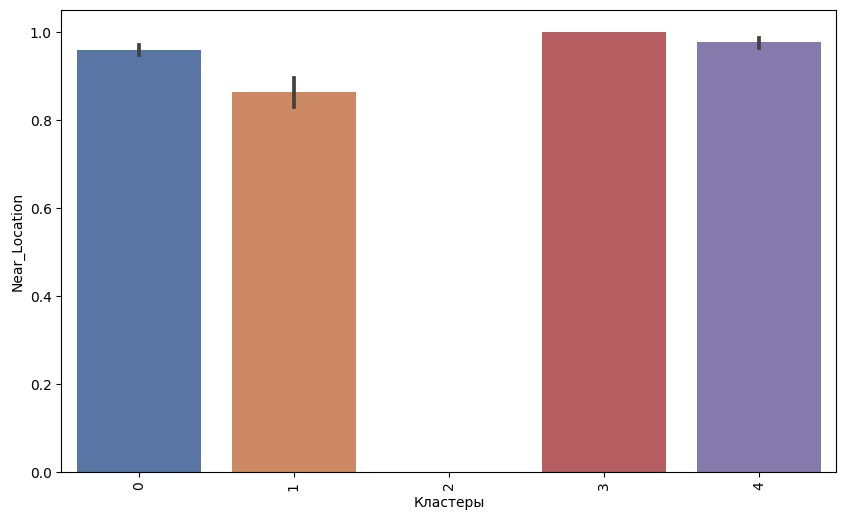

Распределение для признака Partner


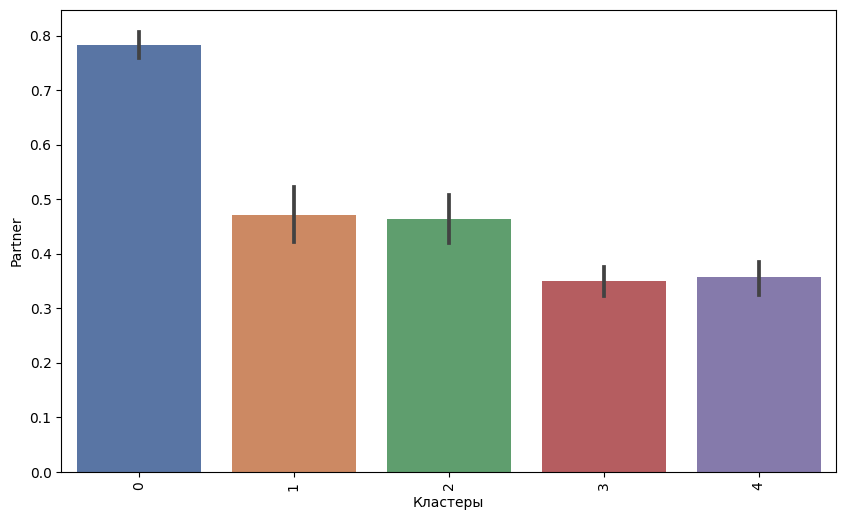

Распределение для признака Promo_friends


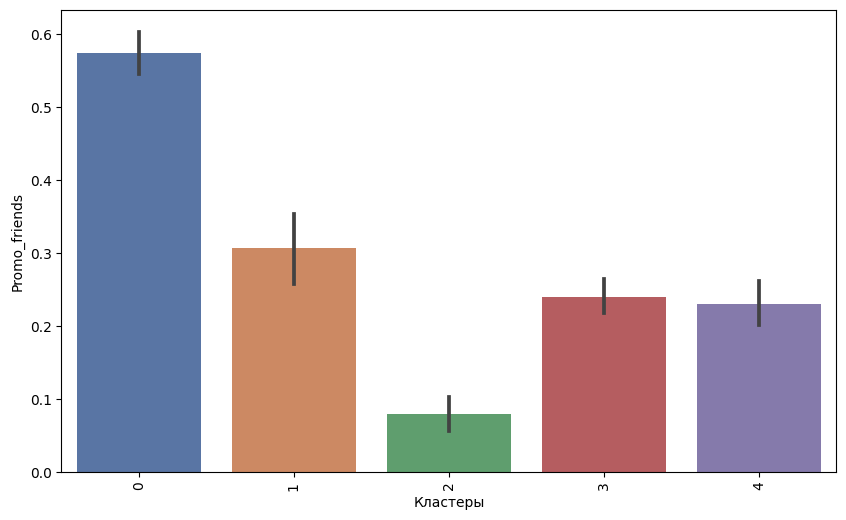

Распределение для признака Phone


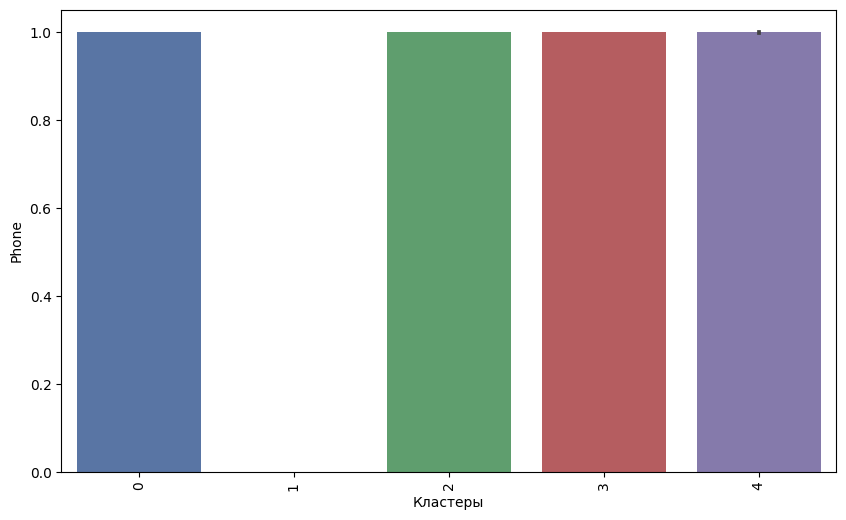

Распределение для признака Contract_period


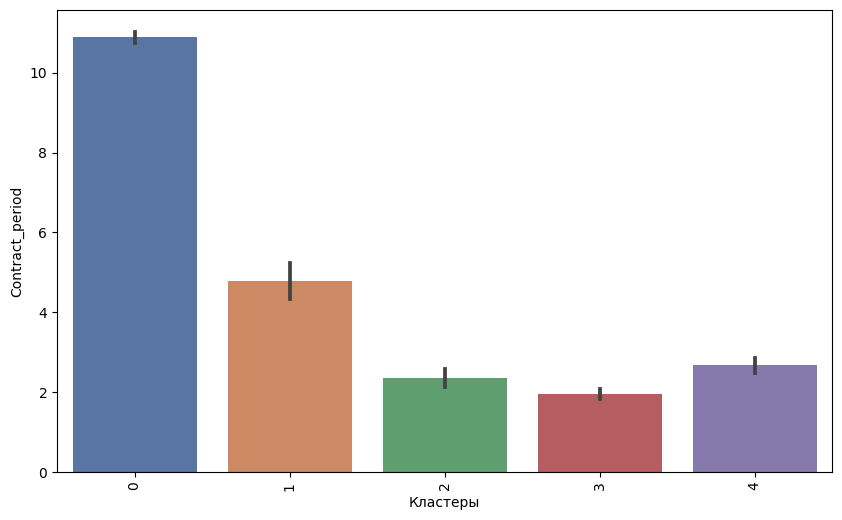

Распределение для признака Group_visits


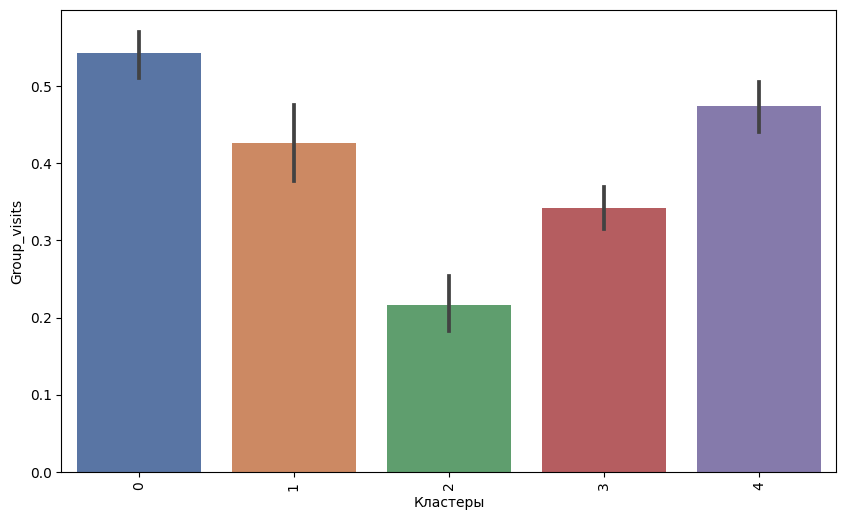

Распределение для признака Age


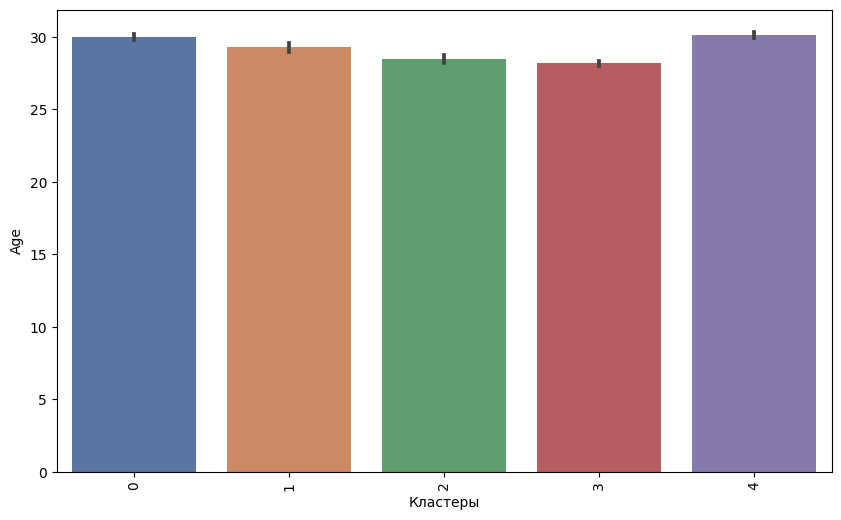

Распределение для признака Avg_additional_charges_total


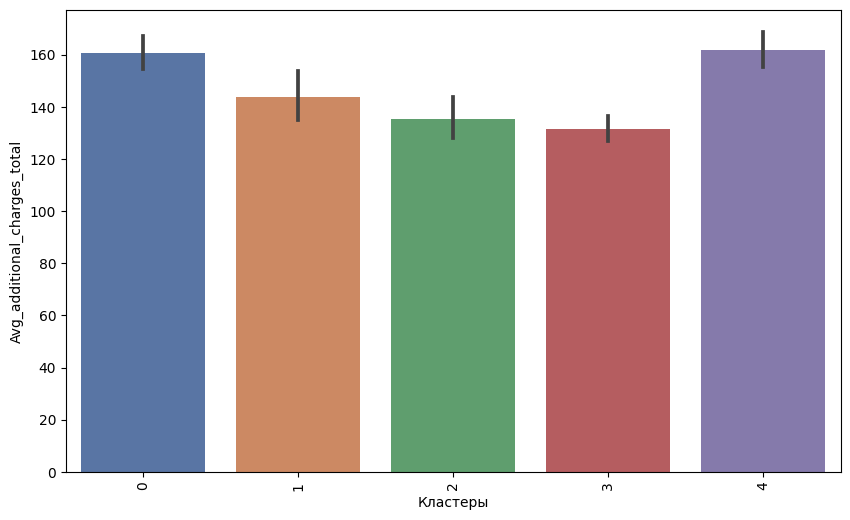

Распределение для признака Month_to_end_contract


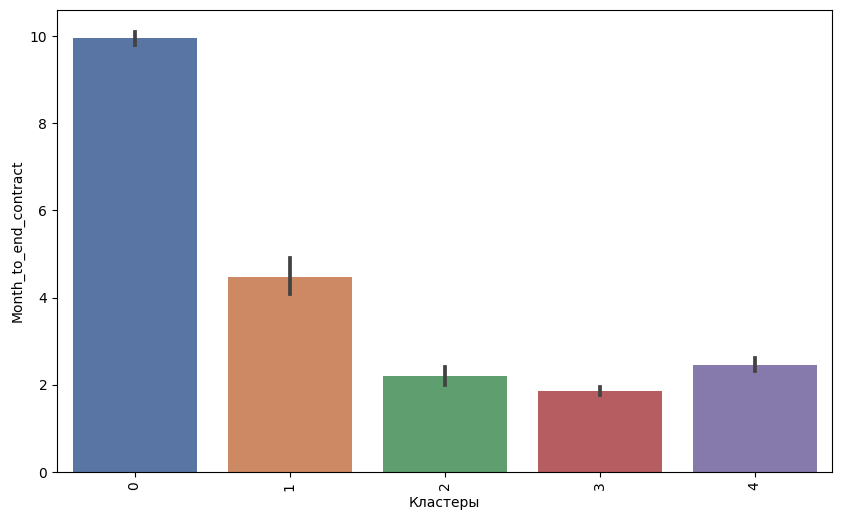

Распределение для признака Lifetime


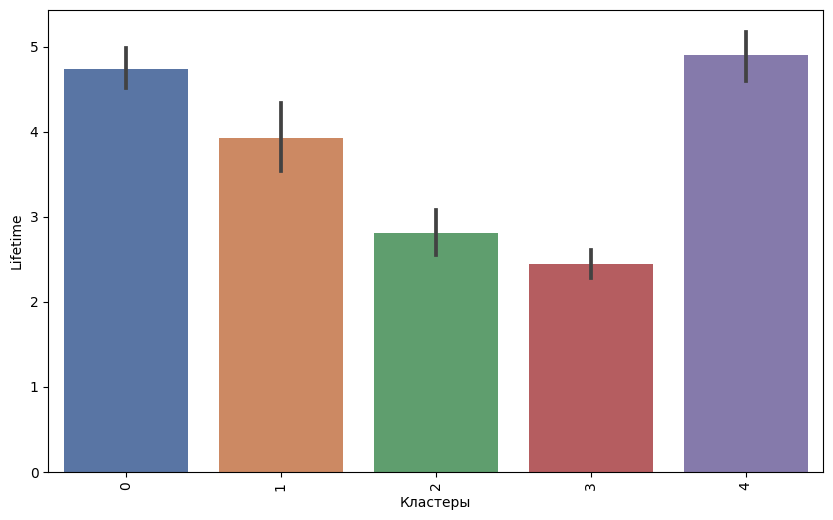

Распределение для признака Avg_class_frequency_total


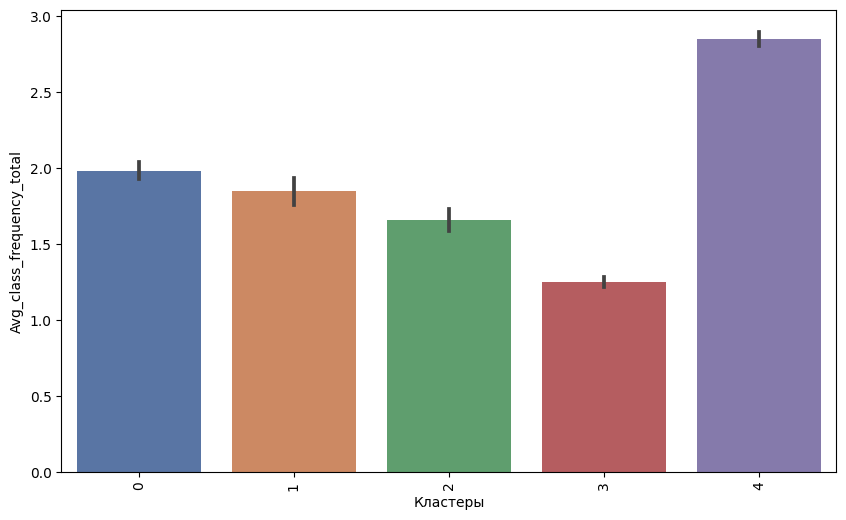

Распределение для признака Avg_class_frequency_current_month


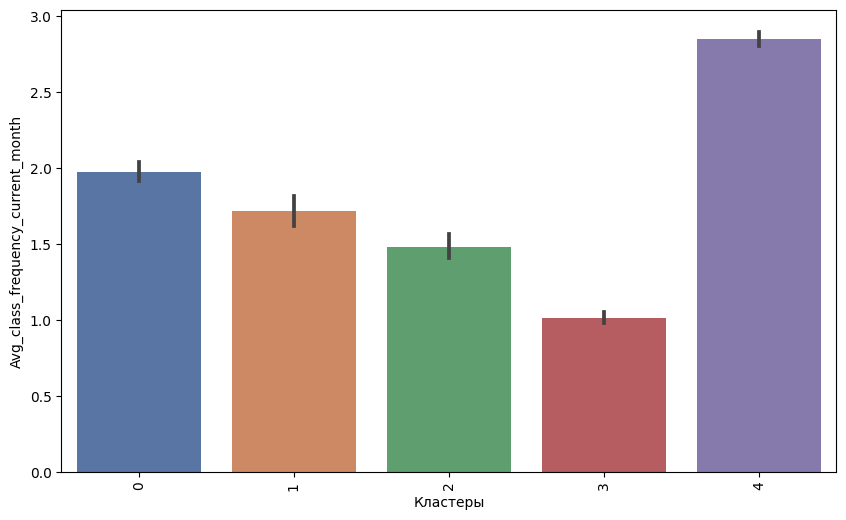

Распределение для признака cluster_km


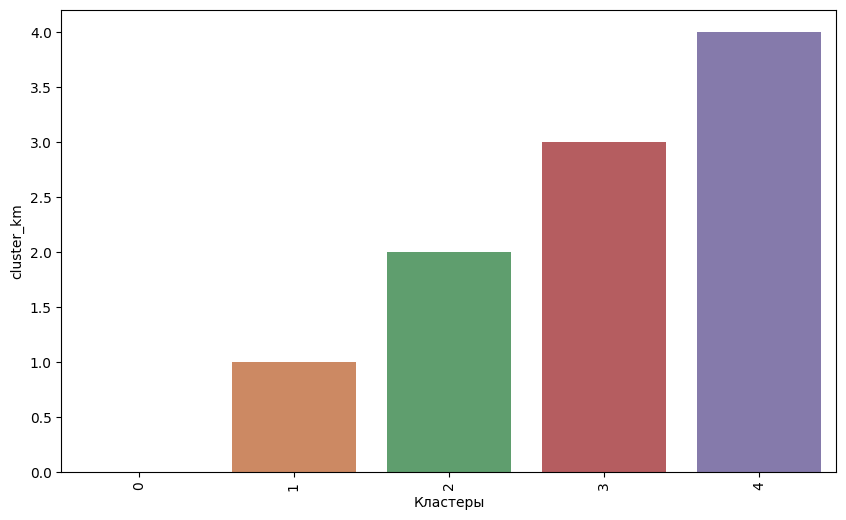

In [172]:
# построим графики распределения каждого признака
for col in data.drop(columns=['Churn']).columns:
    plt.figure(
    figsize=(10, 6)
)
    sns.set_palette('deep')
    ax = sns.barplot(data=data.drop(columns=['Churn']), y=col, x='cluster_km')
    plt.xticks(rotation=90)
    print('Распределение для признака', col) 
    ax.set_xlabel('Кластеры')
    ax.set_ylabel(col) 
    plt.show()


Из данных средних значений признаков и графиков распределения признаков можно сделать следующие выводы:
- клиенты кластера 2 не живут рядом с клубом;
- больше всего сотрудников компаний-партнеров клуба находится в кластере 0. Оттуда же пришло больше всего клиентов по акции "Приведи друга";
- у кластера 0 самый длинный средний период контракта - 10 месяцев, в то время как остальные кластеры имеют распределение от 4,7 до 1,9 месяцев;
- у клиентов из кластера 0 также самый длинный срок до окончания текущего действующего абонемента - 9,9 месяцев, в то время как остальные кластеры имеют распределение от 4,4 до 1,8 месяцев;
- чаще всего групповые занятия посещают клиенты из кластера 0 и 4. Посетители этих же кластеров больше всего тратят на сопутствующие услуги фитнес-центра, а также имеют самое длительное время с момента первого обращения в фитнес-центр (4,7 и 4,9 месяца соответственно);
- клиенты пола 0 возрастом выше 40 лет есть только в кластере 3;
- в кластере 0 клиент с самым высоким расходом на дополнительные услуги пола 0, а в кластере 2 — пола 1;
- средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц выше для кластера 4, и заметно ниже для кластеров 2 и 3;
- клиенты кластера 1 не оставили свой номер телефона.


Посчитаем долю оттока для каждого кластера.

               Churn
cluster_km          
0           0.027723
1           0.267532
2           0.443564
3           0.514263
4           0.068019


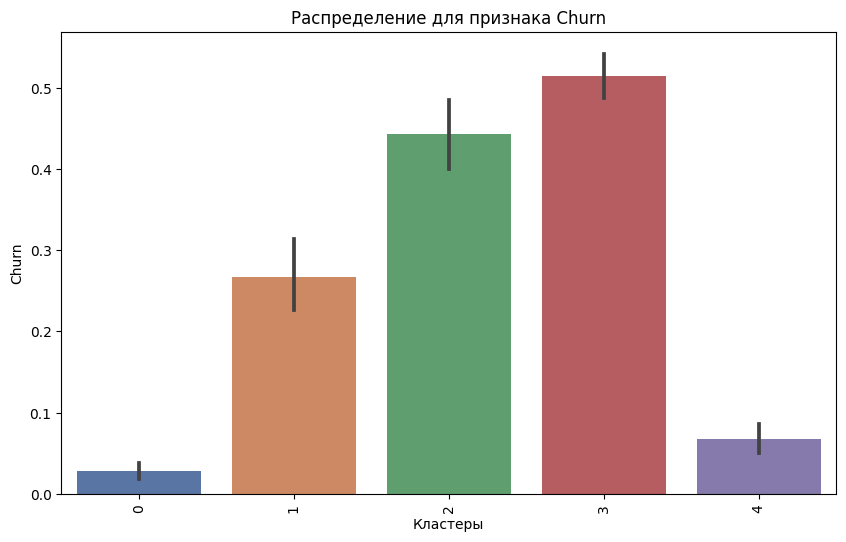

In [173]:
print(data.groupby('cluster_km').agg({'Churn':'mean'}))

plt.figure(
figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(data=data, y='Churn', x='cluster_km')
plt.xticks(rotation=90)
ax.set_title('Распределение для признака Churn') 
ax.set_xlabel('Кластеры')
ax.set_ylabel('Churn') 
plt.show()

Больше всего склонны к оттоку кластеры 3 и 2 (доля оттока 51% и 44% соответственно). Далее следует кластер 1 с 26%. Кластеры 0 и 4 наиболее надежны (доля оттока 0,03% и 0,07% соответственно).

## 5. Выводы и рекомендации
<a name="sumup"></a>

Столкнувшись с оттоком клиентов, отдел по работе с клиентами фитнес-клуба «Культурист-датасаентист» решил подготовить план действий по удержанию клиентов и поставил задачу провести анализ клиентских анкет для разработки стратегии взаимодействия с клиентами для того, чтобы:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
  - выделить целевые группы клиентов;
  - предложить меры по снижению оттока;
  - определить другие особенности взаимодействия с клиентами.

В ходе исследования мы проверили данные на пропуски, аномалии и дубликаты. Затем мы провели исследовательский анализ данных: проанализировали признаки, построили графики распределения их значений, построили матрицу корреляций. После этого мы построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце и оценили метрики accuracy, precision и recallна валидационной выборке. Затем мы провели кластеризацию и проанализировали распределение признаков для кластеров. После чего сформулировали основные выводы и рекомендации для стратегии взаимодействия с клиентами и их удержания.

На основе проведенного анализа мы сделали следующие выводы:

1. Распределение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался, показывает, что:
- Распределение по гендеру практически равномерное, большая доля ушедших и оставшихся клиентов живут рядом, также одинакова доля оставивших номер телефона.
- Следующие признаки различаются:
  - среди оставшихся клиентов больше сотрудников компании-партнёра клуба, чем среди ушедших (53% против 35%);
  - срок контракта больше у оставшихся клиентов, чем у ушедших (5,7 против 1,7 месяцев);
  - также оставшиеся клиенты чаще посещают групповые занятия (46% против 27%);
  - средний возраст оставшихся клиентов - почти 30 лет, ушедших - почти 27;
  - суммарная выручка от других услуг фитнес-центра выше для оставшихся клиентов - 158 у.е. против 115 у.е. для ушедших;
  - количество оставшихся до окончания котракта месяцев больше для оставшихся клиентов, чем для ушедших (5,2 против 1,6);
  - время с момента первого обращения в фитнес-центр: 4.7 месяцев для оставшихся и 0,99 месяцев для ушедших;
  - средняя частота посещений в неделю за все время с начала действия абонемента: 2 против 1,5 для оставшихся и ушедших соответственно;
  - средняя частота посещений в неделю за предыдущий месяц: 2 против 1 для оставшихся и ушедших соответственно.

**Вывод**: гендер и факт указания номера телефона не влияет на решение прекратить занятия в центре. Среди тех, кто продолжает заниматься, большую долю занимают сотрудники компании-партнера возрастом около 30 лет с длительным сроком контракта (и сроком до его окончания), активно посещающие групповые занятия. Они тратят чуть больше на сопутствущие услуги центра и в 1,3 раза чаще посещают фитнес-центр (за все время с начала действия абонемента).

2. Матрица корреляции показывает:
- самая высокая корреляция между сроком контракта и количеством месяцев до его окончания, а также между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц, что видится логичным, т.к. предоставленные данные содержат информацию на месяц до оттока.
- умеренный уровень корреляции (коэффициент 0,45) у признаков Partner и Promo Friend, что может означать, что сотрудники компании-партнера клуба активно приглашали своих коллег записаться в рамках акции «приведи друга».
- остальные коэффициенты очень низкие.
- стоит отметить умеренный отрицательную корреляцию (-0,45) у полей между временем с момента первого обращения в фитнес-центр и фактом оттока, то есть чем дольше клиент является клиентом клуба, тем меньше вероятность его ухода. 
- коэффициент -0,4 у признаков Age и Churn говорит о том возраст также умеренно влияет на факт оттока, чем старше человек, тем меньше вероятность его ухода.

**Вывод**: сотрудники компании-партнера клуба активно приглашают своих коллег записаться в рамках акции «Приведи друга». Есть зависимость между фактом длительности нахождения в списках клиентов клуба и оттоком: чем дольше человек был клиентом, тем ниже вероятность его ухода. Также ниже вероятность ухода у более старших посетителей.

3. Модели прогнозирования оттока клиентов (логистическая регрессия и
случайный лес) показали хорошие результаты на валидационной выборке.

Показатели метрик:
- Accuracy 92% для обоих моделей;
- Precision для логистической регрессии выше, чем для случайного леса: 0,85 против 0,84;
- Recall ниже для случайного леса: 0.81 против 0,83.


4. Кластеризация позволила сделать следующие выводы:
- дендгограмма выделила четыре кластера;
- средние значения признаков и графики распределения признаков показали:
    - клиенты кластера 2 не живут рядом с клубом;
    - больше всего сотрудников компаний-партнеров клуба находится в кластере 0. Оттуда же пришло больше всего клиентов по акции "Приведи друга";
    - у кластера 0 самый длинный средний период контракта - 10 месяцев, в то время как остальные кластеры имеют распределение от 4,7 до 1,9 месяцев;
    - у клиентов из кластера 0 также самый длинный срок до окончания текущего действующего абонемента - 9,9 месяцев, в то время как остальные кластеры имеют распределение от 4,4 до 1,8 месяцев;
    - чаще всего групповые занятия посещают клиенты из кластера 0 и 4. Посетители этих же кластеров больше всего тратят на сопутствующие услуги фитнес-центра, а также имеют самое длительное время с момента первого обращения в фитнес-центр (4,7 и 4,9 месяца соответственно);
    - клиенты пола 0 возрастом выше 40 лет есть только в кластере 3;
    - в кластере 0 клиент с самым высоким расходом на дополнительные услуги пола 0, а в кластере 2 — пола 1;
    - средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц выше для кластера 4, и заметно ниже для кластеров 2 и 3;
    - клиенты кластера 1 не оставили свой номер телефона;
- больше всего склонны к оттоку кластеры 3 и 2 (доля оттока 51% и 44% соответственно). Далее следует кластер 1 с 26%. Кластеры 0 и 4 наиболее надежны (доля оттока 0,03% и 0,07% соответственно).

**Вывод:** клиенты кластера 0 имеют самый длинный средний период контракта, самый длинный срок до окончания текущего действующего абонемента и чаще всего посещают клуб как за все время с начала действия абонемента, так и за последний месяц, они же чаще всего посещают групповые занятия (а также клиенты кластера 4). Посетители этих же кластеров (0 и 4) больше всего тратят на сопутствующие услуги фитнес-центра, а также имеют самое длительное время с момента первого обращения в фитнес-центр. Кластеры 0 и 4 наиболее надежны (доля оттока 0,03% и 0,07% соответственно).

**Рекомендации:**
- стоит обратить внимание на дальнейшее удержание наиболее лояльных клиентов: сотрудников компании-партнера клуба тех, кто уже давно является клиентом центра, особенно в возрасте около 30 лет;
- для того, чтобы удерживать тех, кто чаще уходит, необходимо предлагать более выгодные, но в то же время более длительные контракты для недавних клиентов клуба;
- стоит обратить особое внимание на клиентов кластеров 3 и 2 (доля оттока 51% и 44% соответственно). 



